In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [70]:
customer = pd.read_csv("Users/fabri/Downloads/Kaggle Datasets/customer_sales/customer_data.csv")

In [87]:
customer

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash
...,...,...,...,...
99452,C441542,Female,45.0,Credit Card
99453,C569580,Male,27.0,Cash
99454,C103292,Male,63.0,Debit Card
99455,C800631,Male,56.0,Cash


In [85]:
sales = pd.read_csv("Users/fabri/Downloads/Kaggle Datasets/customer_sales/sales_data.csv")

In [86]:
sales

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon
...,...,...,...,...,...,...,...
99452,I219422,C441542,Souvenir,5,58.65,21-09-2022,Kanyon
99453,I325143,C569580,Food & Beverage,2,10.46,22-09-2021,Forum Istanbul
99454,I824010,C103292,Food & Beverage,2,10.46,28-03-2021,Metrocity
99455,I702964,C800631,Technology,4,4200.00,16-03-2021,Istinye Park


In [74]:
# Check if the 'invoice_date' column exists
if 'invoice_date' in sales.columns:
    # Convert 'invoice_date' to datetime
    sales['invoice_date'] = pd.to_datetime(sales['invoice_date'], format='%d-%m-%Y')
    
    # Set 'invoice_date' as the index
    sales.set_index('invoice_date', inplace=True)
else:
    print("The 'invoice_date' column does not exist in the DataFrame.")

In [75]:
monthly_sales = sales.resample('M').sum() # Resample to monthly frequency and sum sales
decomposition = sm.tsa.seasonal_decompose(monthly_sales['price'])

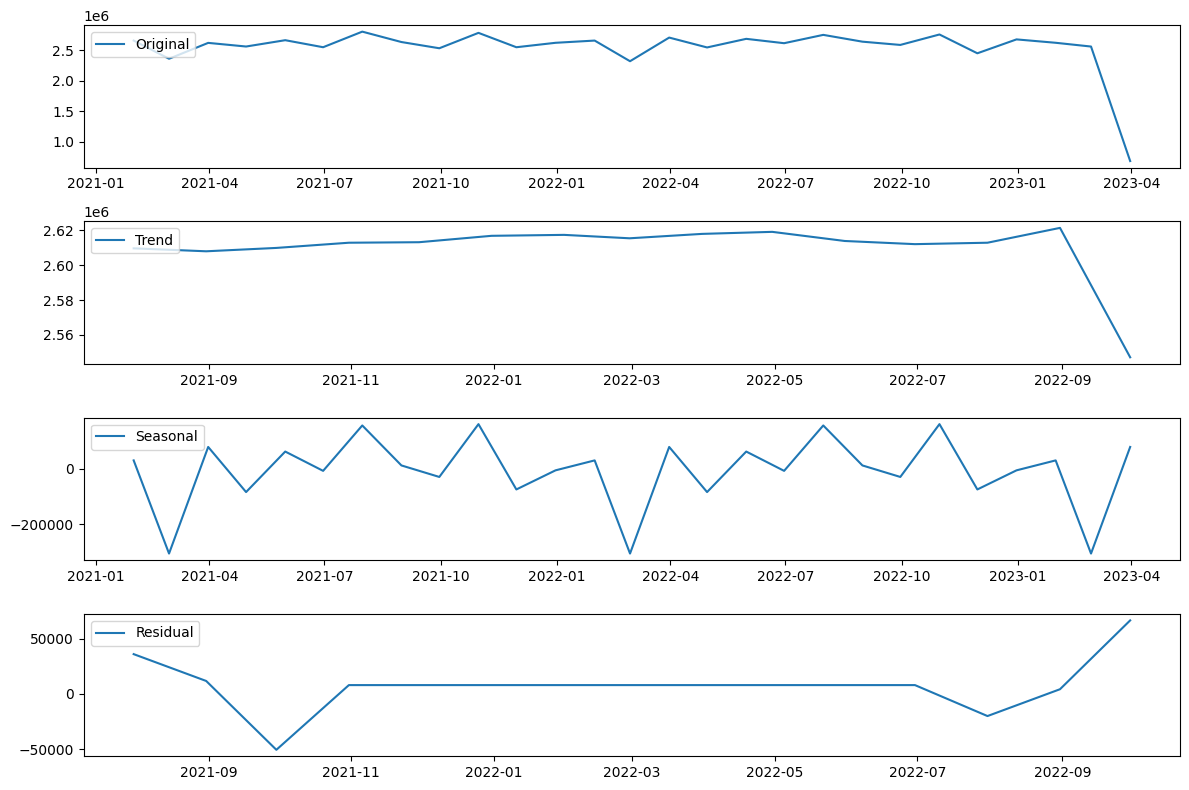

In [76]:
# Plot the original, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(monthly_sales['price'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()

# Display the plots
plt.show()


In [88]:
import os

# Define the directory where you want to save the CSV file
output_directory = 'Users/fabri/Downloads/Kaggle_sales'

# Create the directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)


In [89]:
sales

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon
...,...,...,...,...,...,...,...
99452,I219422,C441542,Souvenir,5,58.65,21-09-2022,Kanyon
99453,I325143,C569580,Food & Beverage,2,10.46,22-09-2021,Forum Istanbul
99454,I824010,C103292,Food & Beverage,2,10.46,28-03-2021,Metrocity
99455,I702964,C800631,Technology,4,4200.00,16-03-2021,Istinye Park


In [90]:
customer

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash
...,...,...,...,...
99452,C441542,Female,45.0,Credit Card
99453,C569580,Male,27.0,Cash
99454,C103292,Male,63.0,Debit Card
99455,C800631,Male,56.0,Cash


In [91]:
# Merge the two dataframes on the 'customer_id' column
merged_df = pd.merge(sales, customer, on='customer_id')

In [92]:
# Specify the file name
csv_file_name = 'merged_data_sales.csv'

In [93]:
# Combine the directory and file name to create the full file path
csv_file_path = output_directory + csv_file_name

In [94]:
# Save the merged dataframe as a CSV file in the specified directory
merged_df.to_csv(csv_file_path, index=False)